In [884]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from textblob import TextBlob
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import pytz
import itertools
import ipywidgets as widgets
import matplotlib.pyplot as plt
import requests
import urllib.parse
import folium 
import string

In [885]:
df = pd.read_csv('twitterData.csv', parse_dates=['created_at'], index_col='created_at')

In [886]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44179 entries, 2020-03-25 06:20:02+00:00 to 2020-05-07 03:48:08+00:00
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   hashtags               17907 non-null  object
 1   favorite_count         44179 non-null  int64 
 2   id                     44179 non-null  int64 
 3   lang                   44179 non-null  object
 4   place                  44162 non-null  object
 5   retweet_count          44179 non-null  int64 
 6   text                   44179 non-null  object
 7   tweet_url              44179 non-null  object
 8   user_screen_name       44179 non-null  object
 9   user_description       37905 non-null  object
 10  user_favourites_count  44179 non-null  int64 
 11  user_followers_count   44179 non-null  int64 
 12  user_friends_count     44179 non-null  int64 
 13  user_listed_count      44179 non-null  int64 
 14  user_location          

In [887]:
df.describe()

favorite_count            id  retweet_count  user_favourites_count  \
count    44179.000000  4.417900e+04   44179.000000           44179.000000   
mean         8.688834  1.249746e+18       2.037122           15413.078906   
std        690.196275  5.513385e+15     110.332251           42971.397214   
min          0.000000  1.242693e+18       0.000000               0.000000   
25%          0.000000  1.244130e+18       0.000000             233.000000   
50%          0.000000  1.250482e+18       0.000000            2192.000000   
75%          1.000000  1.256266e+18       0.000000           11439.000000   
max     144012.000000  1.258242e+18   22549.000000          638151.000000   

       user_followers_count  user_friends_count  user_listed_count  \
count          4.417900e+04        44179.000000       44179.000000   
mean           6.076601e+03          908.844723          15.648951   
std            1.494865e+05         5802.053827          86.748546   
min            0.000000e+00            0.000000           0.000000   
25%            3.400000e+01           98.000000           0.000000   
50%            1.750000e+02          293.000000           0.000000   
75%            8.890000e+02          843.000000           5.000000   
max            1.827721e+07       316697.000000        5775.000000   

       user_statuses_count  
count         4.417900e+04  
mean          1.830381e+04  
std           5.619829e+04  
min           1.000000e+00  
25%           3.990000e+02  
50%           2.476000e+03  
75%           1.330600e+04  
max           2.117851e+06

In [888]:
df

hashtags  \
created_at                                                                     
2020-03-25 06:20:02+00:00                                                NaN   
2020-03-25 06:36:25+00:00                                                NaN   
2020-03-25 06:18:32+00:00                                                NaN   
2020-03-25 06:05:46+00:00                      SSC_UFM_MAT_KARONA Corona UFM   
2020-03-25 06:31:10+00:00                     Corona pritamkumarmurari Voice   
...                                                                      ...   
2020-05-07 03:46:30+00:00  HardAreaAllowance HCWs Corona Doctors Covid Ha...   
2020-05-07 02:57:32+00:00                                                NaN   
2020-05-07 03:47:42+00:00                                                NaN   
2020-05-07 03:48:04+00:00                                                NaN   
2020-05-07 03:48:08+00:00                                                NaN   

                           favorite_count                   id lang  \
created_at                                                            
2020-03-25 06:20:02+00:00               0  1242697733175220000   en   
2020-03-25 06:36:25+00:00               0  1242701857253980000   en   
2020-03-25 06:18:32+00:00               0  1242697356249880000   en   
2020-03-25 06:05:46+00:00               9  1242694142242650000   en   
2020-03-25 06:31:10+00:00               0  1242700536752700000   en   
...                                   ...                  ...  ...   
2020-05-07 03:46:30+00:00              10  1258241775044620000   en   
2020-05-07 02:57:32+00:00               0  1258229450019180000   en   
2020-05-07 03:47:42+00:00               5  1258242077088820000   en   
2020-05-07 03:48:04+00:00               0  1258242168189310000   en   
2020-05-07 03:48:08+00:00               0  1258242183536090000   en   

                                              place  retweet_count  \
created_at                                                           
2020-03-25 06:20:02+00:00               Pune, India              0   
2020-03-25 06:36:25+00:00        Gandhinagar, India              0   
2020-03-25 06:18:32+00:00       Bidhan Nagar, India              0   
2020-03-25 06:05:46+00:00        Maharashtra, India             19   
2020-03-25 06:31:10+00:00  Bokaro Steel City, India              0   
...                                             ...            ...   
2020-05-07 03:46:30+00:00          New Delhi, India              7   
2020-05-07 02:57:32+00:00          Faridabad, India              0   
2020-05-07 03:47:42+00:00             Orissa, India              1   
2020-05-07 03:48:04+00:00              Noida, India              0   
2020-05-07 03:48:08+00:00          Cuddalore, India              0   

                                                                        text  \
created_at                                                                     
2020-03-25 06:20:02+00:00  Meditation and mindfulness tips for coping wit...   
2020-03-25 06:36:25+00:00  Contribute to INDIA FIGHTS CORONA @ Gandhinaga...   
2020-03-25 06:18:32+00:00  @DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...   
2020-03-25 06:05:46+00:00  #SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...   
2020-03-25 06:31:10+00:00  https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...   
...                                                                      ...   
2020-05-07 03:46:30+00:00  #HardAreaAllowance for #HCWs: During #Corona p...   
2020-05-07 02:57:32+00:00  @ZeeNews @sudhirchaudhary But who did not had ...   
2020-05-07 03:47:42+00:00               No Surprises https://t.co/6RWca4U7mP   
2020-05-07 03:48:04+00:00  Coronavirus lockdown: Industries hit hard in S...   
2020-05-07 03:48:08+00:00           Live With Corona https://t.co/Tk8CrHPT2L   

                                                                   tweet_url  \
created_at                                                             

In [889]:
df.lang.value_counts()

en    44179
Name: lang, dtype: int64

In [890]:
np.array_equal(df['user_screen_name'], df['user_screen_name.1'])

True

In [891]:
df.drop(['id', 'lang', 'tweet_url', 'user_screen_name.1'], axis=1, inplace=True)

# Created_at [Overall Weekday, months, hours distribution]

## UTC to IST

In [892]:
ist = pytz.timezone('Asia/Kolkata') 

In [893]:
df.index = df.index.tz_convert(ist)

In [894]:
df.index.min(), df.index.max() 

(Timestamp('2020-03-25 11:32:40+0530', tz='Asia/Kolkata'),
 Timestamp('2020-05-07 09:18:08+0530', tz='Asia/Kolkata'))

## Overall weekday distribution

In [895]:
df.index.weekday.value_counts()  

5    7466
2    7309
1    6576
6    6230
3    5840
4    5415
0    5343
Name: created_at, dtype: int64

## Month distributon

In [896]:
df.index.month.value_counts()  

3    15935
4    15758
5    12486
Name: created_at, dtype: int64

### March's day distrbution

In [897]:
df[df.index.month == 3].index.day.value_counts()  

28    2985
26    2888
31    2798
27    2611
25    1789
29    1536
30    1328
Name: created_at, dtype: int64

### April's day distribution

In [898]:
df[df.index.month == 4].index.day.value_counts()  

1     2426
18    2280
19    2134
20    1711
16    1687
15    1419
14    1384
17    1277
2      967
21     473
Name: created_at, dtype: int64

### May's day distribution

In [899]:
df[df.index.month == 5].index.day.value_counts()  

3    2560
4    2304
2    2201
5    1921
6    1675
1    1527
7     298
Name: created_at, dtype: int64

## Hourly distribution

In [900]:
df.index.hour.value_counts()  

11    3138
12    2962
10    2853
14    2745
13    2732
15    2546
16    2465
18    2412
20    2410
21    2263
19    2224
17    2164
9     2142
22    2056
23    1991
8     1787
0     1468
7     1081
1      816
6      563
2      481
5      345
3      290
4      245
Name: created_at, dtype: int64

# hashtags [Top hashtags]

In [901]:
temp = df[~df.hashtags.isnull()]

In [902]:
data = {}

In [903]:
allHashTags = tuple(itertools.chain.from_iterable(temp.hashtags.str.lower().str.split().values.tolist()))

In [904]:
for i in allHashTags:
    if i not in data:
        data[i] = 1
    else:
        data[i] += 1

In [905]:
sortedHashTags = tuple(sorted(data.items(), key= lambda x: x[1])[::-1])

In [906]:
hashTagsDf = pd.DataFrame(sortedHashTags, columns=['Hash Tag', 'Count'])

In [907]:
def displayHashTags(number):
    return hashTagsDf[:number]

In [912]:
interact(displayHashTags, number=widgets.IntSlider(min=0, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='number', max=30), Output()), _dom_classes=('widget-inte…

# place [Top places and Folium map]

In [913]:
places_with_counts_initial = pd.DataFrame(data=[df.place.value_counts().index, df.place.value_counts().values]).T

In [914]:
places_with_counts_initial

0     1
0            New Delhi, India  5192
1               Mumbai, India  4488
2      Bengaluru South, India  1479
3              Kolkata, India  1034
4                Noida, India   897
...                       ...   ...
2573        Pallikonda, India     1
2574           Lajpat Nagar I     1
2575           Rambagh, Basti     1
2576  Baashyam Pinnacle Crest     1
2577            Digras, India     1

[2578 rows x 2 columns]

In [915]:
def displayPlaces(count):
    return places_with_counts_initial[:count]

In [916]:
interact(displayPlaces, count=widgets.IntSlider(min=0, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='count', max=30), Output()), _dom_classes=('widget-inter…

## Obtaining Lat & lon of locations

In [917]:
def returnLat_Lon(address):
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    try:
        return (response[0]['lat'], response[0]['lon'])
    except:
        return 'Not Found'

In [918]:
# This Process takes 30 minutes to get coordinates of all the places and therefore it was run only at onces during exploration and then saved as json!

# places_with_counts['map_locations'] = places_with_counts[0].apply(returnLat_Lon)
# places_with_counts.to_json('Cities_map_coordinates.json')

In [919]:
places_with_counts = pd.read_json('Cities_map_coordinates.json')

In [920]:
places_with_counts

0     1  \
0                              New Delhi, India  5192   
1                                 Mumbai, India  4488   
2                        Bengaluru South, India  1479   
3                                Kolkata, India  1034   
4                                  Noida, India   897   
...                                         ...   ...   
2573             Dr R.N.Cooper Mun.Gen Hospital     1   
2574                   Krishna Nagar, Bhavnagar     1   
2575  Rudraprayag Tower, Ramdevnagar, Satellite     1   
2576                             Phalodi, India     1   
2577             Dalsingh sarai Railway Station     1   

                        map_locations  
0            [28.6138954, 77.2090057]  
1            [19.0759899, 72.8773928]  
2            [12.9791198, 77.5912997]  
3     [22.5414185, 88.35769124388872]  
4            [28.5707841, 77.3271074]  
...                               ...  
2573                        Not Found  
2574                        Not Found  
2575                        Not Found  
2576         [27.1294121, 72.3649644]  
2577          [25.6650421, 85.841369]  

[2578 rows x 3 columns]

In [921]:
filtered_locations = places_with_counts[places_with_counts.map_locations != 'Not Found']

In [922]:
filtered_locations

0     1                    map_locations
0                    New Delhi, India  5192         [28.6138954, 77.2090057]
1                       Mumbai, India  4488         [19.0759899, 72.8773928]
2              Bengaluru South, India  1479         [12.9791198, 77.5912997]
3                      Kolkata, India  1034  [22.5414185, 88.35769124388872]
4                        Noida, India   897         [28.5707841, 77.3271074]
...                               ...   ...                              ...
2570                    Jalaun, India     1   [26.105546, 79.42765264782076]
2571  Nissing, Karnal, Haryana, India     1          [29.691133, 76.7606231]
2572                 Rani Sati Temple     1  [21.2460765, 81.64759963875372]
2576                   Phalodi, India     1         [27.1294121, 72.3649644]
2577   Dalsingh sarai Railway Station     1          [25.6650421, 85.841369]

[2129 rows x 3 columns]

## Plotting Folium Map

In [923]:
coordinates = tuple(zip(*filtered_locations.map_locations))

In [924]:
coordinates_lat = tuple(float(i) for i in coordinates[0])

In [925]:
coordinates_long = tuple(float(i) for i in coordinates[1])

In [926]:
center_lat = np.mean(coordinates_lat)
center_long = np.mean(coordinates_long)

In [927]:
locations = filtered_locations['0'].values

In [928]:
location_tweet_counts = filtered_locations['1'].values

In [929]:
m = folium.Map(location=[center_lat, center_long], titles='cartodbpositron', zoom_start=4.5)

for i in range(len(locations)):
    
    folium.CircleMarker(
        location=[coordinates_lat[i], coordinates_long[i]],
        radius = float(location_tweet_counts[i]/80),
        popup=f"{locations[i]}",
        tooltip = float(location_tweet_counts[i]),
        color="blue",
        fill_color="blue"
    ).add_to(m)

m

# Most tagged person in tweets

In [930]:
taggedPersons = df.text.str.findall(r"@[\w]+").values

In [931]:
mergedListPersons = tuple(itertools.chain.from_iterable([i for i in taggedPersons if len(i)!=0]))

In [932]:
tagsCount = {}

for i in mergedListPersons:
    if i not in tagsCount:
        tagsCount[i] = 1
    else:
        tagsCount[i] += 1

In [933]:
sortedTagsCount = pd.DataFrame(sorted(tagsCount.items(), key=lambda x: x[1])[::-1])

In [934]:
def displayMostTagged(count):
    return sortedTagsCount[:count]

In [935]:
interact(displayMostTagged, count=widgets.IntSlider(min=0, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='count', max=30), Output()), _dom_classes=('widget-inter…

# Trending hashtags of every place

In [937]:
temp_df = df[['hashtags', 'place']]

In [938]:
temp_df = temp_df[~temp_df.hashtags.isnull()]

In [939]:
placesTags = temp_df.groupby('place').sum()

In [940]:
def splitCountTags(row):
    tags = row.split()
    counts = {}
    for i in tags:
        if i not in counts:
            counts[i] = 1
        else:
            counts[i] += 1
    counts = sorted(counts.items(), key=lambda x: x[1])[::-1]
    return counts

In [941]:
placesTagsWithCount = placesTags.hashtags.apply(splitCountTags)

In [943]:
dropDownLocation = placesTagsWithCount.index

In [944]:
def displayLocationTags(place, count):
    return pd.DataFrame(placesTagsWithCount[place])[:count]

In [945]:
interact(displayLocationTags, place=dropDownLocation, count=widgets.IntSlider(min=0, max=30, step=1, value=10));

interactive(children=(Dropdown(description='place', options=('26 Block, west patel nagar', 'AAIMS', 'AIIMS', '…

# Most engaged user

In [946]:
mostEngaged = pd.DataFrame(df.user_screen_name.value_counts())

In [947]:
def displayMostEngagedUsers(count):
    return mostEngaged[:count]

In [948]:
interact(displayMostEngagedUsers, count=widgets.IntSlider(min=0, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='count', max=30), Output()), _dom_classes=('widget-inter…

# Tweets Text Analysis

In [949]:
def removePunctuation(row):
    cleaned = ''.join([w for w in row if w not in string.punctuation])
    return cleaned

In [950]:
def removeExtras(column):
    patterns = ['@[\w+]', '#[\w+]', 'http\S+', '\n', '@']
    for pattern in patterns:
        column = column.str.replace(pattern, '')
    return column.str.lower()

In [951]:
def tokenizeSentence(row):
    return word_tokenize(row)

In [952]:
stopWordsTofollow = set(stopwords.words('english'))

In [953]:
def removeStopWords(row):
    cleanedSentence = [w for w in row if w not in stopWordsTofollow]
    return ' '.join(cleanedSentence)

In [954]:
df['cleaned_text'] = df.text.apply(removePunctuation)

In [955]:
df['cleaned_text'] = removeExtras(df.cleaned_text)

In [956]:
df['cleaned_text'] = df.cleaned_text.apply(tokenizeSentence)

In [957]:
df['cleaned_text'] = df.cleaned_text.apply(removeStopWords)

In [958]:
df.head()

hashtags  favorite_count  \
created_at                                                                  
2020-03-25 11:50:02+05:30                             NaN               0   
2020-03-25 12:06:25+05:30                             NaN               0   
2020-03-25 11:48:32+05:30                             NaN               0   
2020-03-25 11:35:46+05:30   SSC_UFM_MAT_KARONA Corona UFM               9   
2020-03-25 12:01:10+05:30  Corona pritamkumarmurari Voice               0   

                                              place  retweet_count  \
created_at                                                           
2020-03-25 11:50:02+05:30               Pune, India              0   
2020-03-25 12:06:25+05:30        Gandhinagar, India              0   
2020-03-25 11:48:32+05:30       Bidhan Nagar, India              0   
2020-03-25 11:35:46+05:30        Maharashtra, India             19   
2020-03-25 12:01:10+05:30  Bokaro Steel City, India              0   

                                                                        text  \
created_at                                                                     
2020-03-25 11:50:02+05:30  Meditation and mindfulness tips for coping wit...   
2020-03-25 12:06:25+05:30  Contribute to INDIA FIGHTS CORONA @ Gandhinaga...   
2020-03-25 11:48:32+05:30  @DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...   
2020-03-25 11:35:46+05:30  #SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...   
2020-03-25 12:01:10+05:30  https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...   

                          user_screen_name  \
created_at                                   
2020-03-25 11:50:02+05:30      ShalomFloat   
2020-03-25 12:06:25+05:30     prakashkalal   
2020-03-25 11:48:32+05:30    Bhartendulkar   
2020-03-25 11:35:46+05:30        patilkiii   
2020-03-25 12:01:10+05:30  SINGERMurariPa1   

                                                            user_description  \
created_at                                                                     
2020-03-25 11:50:02+05:30  Shalom float spa is the first dedicated float ...   
2020-03-25 12:06:25+05:30                                                NaN   
2020-03-25 11:48:32+05:30  Senior Media Analyst @Indianpac | Ex Sr Report...   
2020-03-25 11:35:46+05:30  Ab khushi de ke aazma le khuda, In ghamon se t...   
2020-03-25 12:01:10+05:30               Singing,Dancing,Acting,Entertainment   

                           user_favourites_count  user_followers_count  \
created_at                                                               
2020-03-25 11:50:02+05:30                    252                   382   
2020-03-25 12:06:25+05:30                    693                   175   
2020-03-25 11:48:32+05:30                   5273                   609   
2020-03-25 11:35:46+05:30                   1744                   259   
2020-03-25 12:01:10+05:30                      4                     2   

                           user_friends_count  user_listed_count  \
created_at                                                         
2020-03-25 11:50:02+05:30                  97                 24   
2020-03-25 12:06:25+05:30                 107                  0   
2020-03-25 11:48:32+05:30                2239                  7   
2020-03-25 11:35:46+05:30                 786                  0   
2020-03-25 12:01:10+05:30                 163                  0   

                                                               user_location  \
created_at                                                                     
2020-03-25 11:50:02+05:30                                              India   
2020-03-25 12:06:25+05:30                                 Gandhinagar, India   
2020-03-25 11:48:32+05:30                                     Kolkata, India   
2020-03-25 11:35:46+05:30                                        Pune, India   
2020-03-25 12:01:10+05:30  ‡§¨‡•ã‡§ï‡§æ‡§∞‡•ã ‡§∏‡•ç‡§ü‡•Ä‡§≤ ‡§∏‡§ø‡§ü‡•...   

                

## Wordcloud

In [959]:
corpus = ''.join(df.cleaned_text.values.tolist())

In [960]:
def generateWordCloud(person, corpus):
    
    mask = np.array(Image.open(f'{person}.png'))
    wc = WordCloud(width=800, 
               height=500, 
               random_state=0, 
               colormap='tab20c',  
               mask=mask, 
               contour_width=1,
               stopwords=['amp'],
               contour_color='orange').generate_from_text(corpus)

    plt.figure(figsize=(12, 7))
    plt.imshow(wc, interpolation="bilinear")
    plt.style.use('dark_background')
    plt.axis('off')
    plt.show()

In [961]:
interact(generateWordCloud, person=['Modiji', 'Trump'], corpus=fixed(corpus));

interactive(children=(Dropdown(description='person', options=('Modiji', 'Trump'), value='Modiji'), Output()), …

## Pos, neg and neutrals

In [962]:
def sentiment(row):
    polarity = TextBlob(row).sentiment.polarity
    if  polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [963]:
df['text_sentiment'] = df.cleaned_text.apply(sentiment)

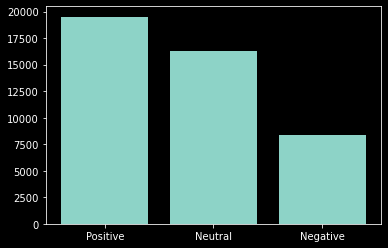

In [966]:
plt.bar(df.text_sentiment.value_counts().index, height=df.text_sentiment.value_counts().values);

In [967]:
positive = df[df.text_sentiment == 'Positive']
negative = df[df.text_sentiment == 'Negative']
neutral = df[df.text_sentiment == 'Neutral']

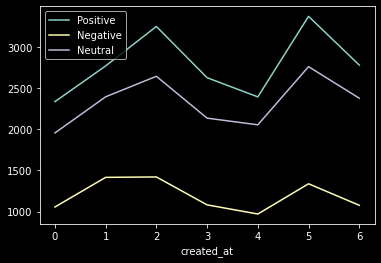

In [968]:
positive.groupby(positive.index.weekday).count()['text_sentiment'].plot(label='Positive', legend=True)
negative.groupby(negative.index.weekday).count()['text_sentiment'].plot(label='Negative', legend=True)
neutral.groupby(neutral.index.weekday).count()['text_sentiment'].plot(label='Neutral', legend=True)

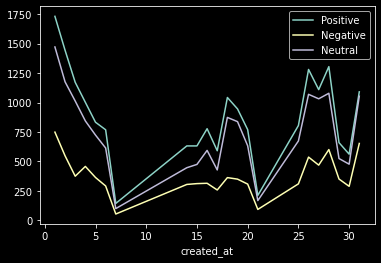

In [969]:
positive.groupby(positive.index.day).count()['text_sentiment'].plot(label='Positive', legend=True)
negative.groupby(negative.index.day).count()['text_sentiment'].plot(label='Negative', legend=True)
neutral.groupby(neutral.index.day).count()['text_sentiment'].plot(label='Neutral', legend=True)

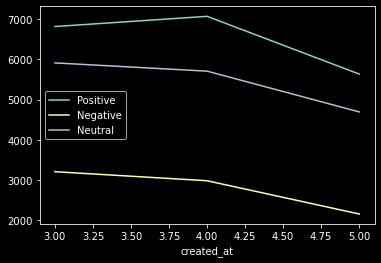

In [970]:
positive.groupby(positive.index.month).count()['text_sentiment'].plot(label='Positive', legend=True)
negative.groupby(negative.index.month).count()['text_sentiment'].plot(label='Negative', legend=True)
neutral.groupby(neutral.index.month).count()['text_sentiment'].plot(label='Neutral', legend=True)

In [971]:
temp_positive = positive.groupby(positive.place).count()['text_sentiment']
temp_negative = negative.groupby(negative.place).count()['text_sentiment']
temp_neutral = neutral.groupby(neutral.place).count()['text_sentiment']

<BarContainer object of 37 artists>

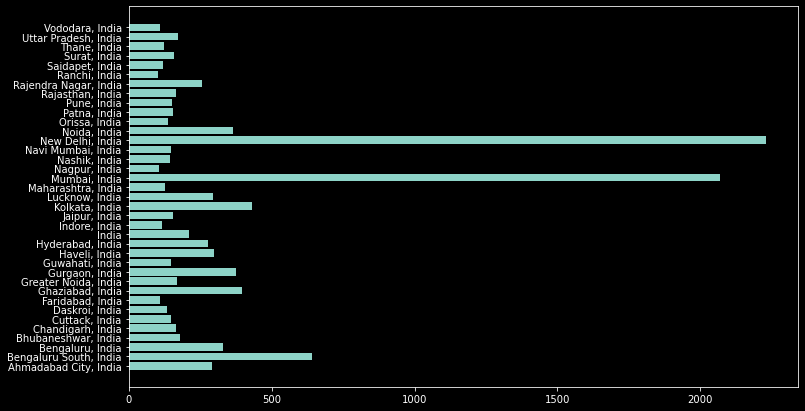

In [972]:
plt.figure(figsize=(12, 7))
plt.barh(temp_positive[temp_positive > 100].index, width=temp_positive[temp_positive > 100].values)

<BarContainer object of 13 artists>

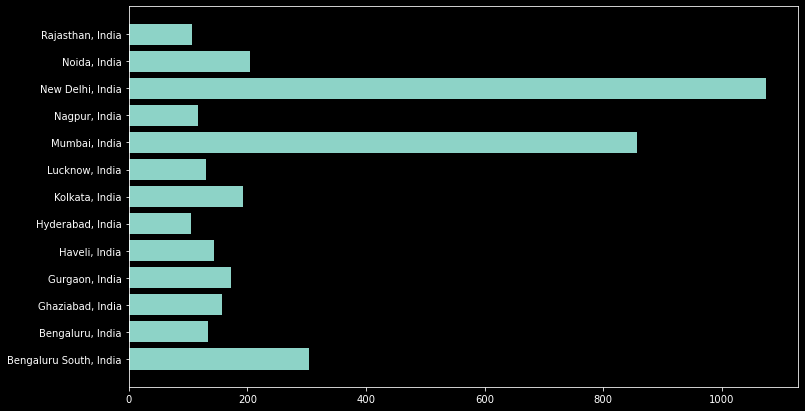

In [973]:
plt.figure(figsize=(12, 7))

plt.barh(temp_negative[temp_negative > 100].index, width=temp_negative[temp_negative > 100].values)

<BarContainer object of 30 artists>

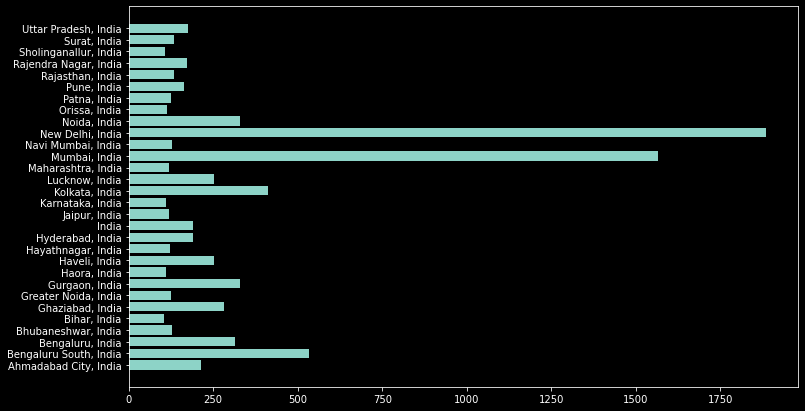

In [974]:
plt.figure(figsize=(12, 7))

plt.barh(temp_neutral[temp_neutral > 100].index, width=temp_neutral[temp_neutral > 100].values)

## Users Data Analysis

## Bio 

In [975]:
userFiltered = df.copy()

In [976]:
userFiltered = userFiltered[~userFiltered.user_description.isnull()]

In [977]:
userFiltered['cleaned_user_description'] = removeExtras(userFiltered.user_description)
userFiltered['cleaned_user_description'] = userFiltered.cleaned_user_description.apply(tokenizeSentence)
userFiltered['cleaned_user_description'] = userFiltered.cleaned_user_description.apply(removeStopWords)

In [978]:
userFiltered

hashtags  \
created_at                                                                     
2020-03-25 11:50:02+05:30                                                NaN   
2020-03-25 11:48:32+05:30                                                NaN   
2020-03-25 11:35:46+05:30                      SSC_UFM_MAT_KARONA Corona UFM   
2020-03-25 12:01:10+05:30                     Corona pritamkumarmurari Voice   
2020-03-25 12:05:29+05:30                                                NaN   
...                                                                      ...   
2020-05-07 09:07:13+05:30  Kerela India pinarayivijayan COVID19 FightAgai...   
2020-05-07 09:16:30+05:30  HardAreaAllowance HCWs Corona Doctors Covid Ha...   
2020-05-07 09:17:42+05:30                                                NaN   
2020-05-07 09:18:04+05:30                                                NaN   
2020-05-07 09:18:08+05:30                                                NaN   

                           favorite_count                     place  \
created_at                                                            
2020-03-25 11:50:02+05:30               0               Pune, India   
2020-03-25 11:48:32+05:30               0       Bidhan Nagar, India   
2020-03-25 11:35:46+05:30               9        Maharashtra, India   
2020-03-25 12:01:10+05:30               0  Bokaro Steel City, India   
2020-03-25 12:05:29+05:30               0             Mumbai, India   
...                                   ...                       ...   
2020-05-07 09:07:13+05:30               0            Kolkata, India   
2020-05-07 09:16:30+05:30              10          New Delhi, India   
2020-05-07 09:17:42+05:30               5             Orissa, India   
2020-05-07 09:18:04+05:30               0              Noida, India   
2020-05-07 09:18:08+05:30               0          Cuddalore, India   

                           retweet_count  \
created_at                                 
2020-03-25 11:50:02+05:30              0   
2020-03-25 11:48:32+05:30              0   
2020-03-25 11:35:46+05:30             19   
2020-03-25 12:01:10+05:30              0   
2020-03-25 12:05:29+05:30              0   
...                                  ...   
2020-05-07 09:07:13+05:30              0   
2020-05-07 09:16:30+05:30              7   
2020-05-07 09:17:42+05:30              1   
2020-05-07 09:18:04+05:30              0   
2020-05-07 09:18:08+05:30              0   

                                                                        text  \
created_at                                                                     
2020-03-25 11:50:02+05:30  Meditation and mindfulness tips for coping wit...   
2020-03-25 11:48:32+05:30  @DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...   
2020-03-25 11:35:46+05:30  #SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...   
2020-03-25 12:01:10+05:30  https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...   
2020-03-25 12:05:29+05:30  @funnyhammy @GauravPandhi Dumbo, it's the amou...   
...                                                                      ...   
2020-05-07 09:07:13+05:30  Oh great indeed #Kerela #India #pinarayivijaya...   
2020-05-07 09:16:30+05:30  #HardAreaAllowance for #HCWs: During #Corona p...   
2020-05-07 09:17:42+05:30               No Surprises https://t.co/6RWca4U7mP   
2020-05-07 09:18:04+05:30  Coronavirus lockdown: Industries hit hard in S...   
2020-05-07 09:18:08+05:30           Live With Corona https://t.co/Tk8CrHPT2L   

                          user_screen_name  \
created_at                                   
2020-03-25 11:50:02+05:30      ShalomFloat   
2020-03-25 11:48:32+05:30    Bhartendulkar   
2020-03-25 11:35:46+05:30        patilkiii   
2020-03-25 12:01:10+05:30  SINGERMurariPa1   
2020-03-25 12:05:29+05:30       amjadmaruf   
...                                    ...   
2020-05-07 09:07:13+05:30  learnwithrohanb   
2020-05-07 09:16:30+05:30   ompsychiatrist   
2020-05-07 09:17:42+05:30    

In [979]:
corpus_user = ' '.join(userFiltered.cleaned_user_description.values.tolist())

In [980]:
interact(generateWordCloud, person=['Trump', 'Modiji'], corpus=fixed(corpus_user));

interactive(children=(Dropdown(description='person', options=('Trump', 'Modiji'), value='Trump'), Output()), _…

## Celebrity Handles

In [981]:
celebrities = df.groupby('user_screen_name').max('user_followers_count').sort_values(by='user_followers_count', ascending=False)

In [982]:
def displayCelebrities(count):
    return pd.DataFrame(celebrities['user_followers_count'])[:count]

In [983]:
interact(displayCelebrities, count=widgets.IntSlider(min=0, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='count', max=30), Output()), _dom_classes=('widget-inter…

# Popular Tweet

In [984]:
popularTweets = df.sort_values(by='favorite_count', ascending=False)[['text', 'favorite_count', 'user_screen_name']]

In [985]:
popularTweets.reset_index(drop=True, inplace=True)

In [986]:
def displayPopularTweets(count):
    return popularTweets[:count]

In [987]:
interact(displayPopularTweets, count=widgets.IntSlider(min=0, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='count', max=30), Output()), _dom_classes=('widget-inter…

# Final Dataset for DashBoard

In [988]:
df.drop(['retweet_count', 'user_favourites_count', 'user_friends_count', 'user_listed_count', 'user_location', 'user_statuses_count'], axis=1, inplace=True)

In [998]:
df.to_csv('Cleaned_data.csv')

In [999]:
dff = pd.read_csv('Cleaned_data.csv', index_col='created_at')

In [1000]:
dff

hashtags  \
created_at                                                                     
2020-03-25 11:50:02+05:30                                                NaN   
2020-03-25 12:06:25+05:30                                                NaN   
2020-03-25 11:48:32+05:30                                                NaN   
2020-03-25 11:35:46+05:30                      SSC_UFM_MAT_KARONA Corona UFM   
2020-03-25 12:01:10+05:30                     Corona pritamkumarmurari Voice   
...                                                                      ...   
2020-05-07 09:16:30+05:30  HardAreaAllowance HCWs Corona Doctors Covid Ha...   
2020-05-07 08:27:32+05:30                                                NaN   
2020-05-07 09:17:42+05:30                                                NaN   
2020-05-07 09:18:04+05:30                                                NaN   
2020-05-07 09:18:08+05:30                                                NaN   

                           favorite_count                     place  \
created_at                                                            
2020-03-25 11:50:02+05:30               0               Pune, India   
2020-03-25 12:06:25+05:30               0        Gandhinagar, India   
2020-03-25 11:48:32+05:30               0       Bidhan Nagar, India   
2020-03-25 11:35:46+05:30               9        Maharashtra, India   
2020-03-25 12:01:10+05:30               0  Bokaro Steel City, India   
...                                   ...                       ...   
2020-05-07 09:16:30+05:30              10          New Delhi, India   
2020-05-07 08:27:32+05:30               0          Faridabad, India   
2020-05-07 09:17:42+05:30               5             Orissa, India   
2020-05-07 09:18:04+05:30               0              Noida, India   
2020-05-07 09:18:08+05:30               0          Cuddalore, India   

                                                                        text  \
created_at                                                                     
2020-03-25 11:50:02+05:30  Meditation and mindfulness tips for coping wit...   
2020-03-25 12:06:25+05:30  Contribute to INDIA FIGHTS CORONA @ Gandhinaga...   
2020-03-25 11:48:32+05:30  @DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...   
2020-03-25 11:35:46+05:30  #SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...   
2020-03-25 12:01:10+05:30  https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...   
...                                                                      ...   
2020-05-07 09:16:30+05:30  #HardAreaAllowance for #HCWs: During #Corona p...   
2020-05-07 08:27:32+05:30  @ZeeNews @sudhirchaudhary But who did not had ...   
2020-05-07 09:17:42+05:30               No Surprises https://t.co/6RWca4U7mP   
2020-05-07 09:18:04+05:30  Coronavirus lockdown: Industries hit hard in S...   
2020-05-07 09:18:08+05:30           Live With Corona https://t.co/Tk8CrHPT2L   

                          user_screen_name  \
created_at                                   
2020-03-25 11:50:02+05:30      ShalomFloat   
2020-03-25 12:06:25+05:30     prakashkalal   
2020-03-25 11:48:32+05:30    Bhartendulkar   
2020-03-25 11:35:46+05:30        patilkiii   
2020-03-25 12:01:10+05:30  SINGERMurariPa1   
...                                    ...   
2020-05-07 09:16:30+05:30   ompsychiatrist   
2020-05-07 08:27:32+05:30     Dubeymkd1944   
2020-05-07 09:17:42+05:30    Bikram_Odisha   
2020-05-07 09:18:04+05:30            liyer   
2020-05-07 09:18:08+05:30        king_rizu   

                                                            user_description  \
created_at                                                                     
2020-03-25 11:50:02+05:30  Shalom float spa is the first dedicated float ...   
2020-03-25 12:06:25+05:30                                                NaN   
2020-03-25 11:48:32+05:30  Senior Media Analyst @Indianpac | Ex Sr Report...   
2020-03-25 11:35:46+05:30  Ab khushi de ke aazma le khuda, In g